# Exercício 6
Utilizando o dataset Mushroom Classification (disponível em https://www.kaggle.com/uciml/mushroom-classification)
construa um classificador Naive Bayes (Gaussiano ou não) que classifique as amostras em cogumelos comestíveis ou não.

Avalie as características do problema para eliminar as que não agregam capacidade decisória ao classificador. 

### 1 - Vamos importar algumas bibliotecas que iremos utilizar nesse exercício

In [1]:
import pandas as pd
from pandas import DataFrame as df
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

### 2 - Vamos ler o conjunto de dados utilizando a função read_csv() do pacote Pandas

In [2]:
mushrooms = pd.read_csv('mushrooms.csv', sep=',')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 3- Verificar se a variável "class" é binária, visto que queremos classificar os cogumelos em comestíveis ou não

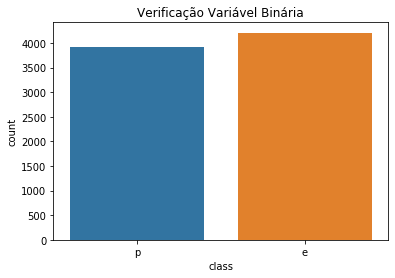

In [3]:
plot = sb.countplot(x='class', data=mushrooms)
plt.title('Verificação Variável Binária')
plt.show(plot)

### 4 - Análise do dataset

Verificar valores nulos

In [4]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### 5 - Ajustando os types do dataset

Vemos que o dataset foi todo construído com dtype = object. 

*Precisamos encontrar um modo de transformá-lo em variaveis quantitativas.Para isso vamos usar o LabelEncoder do SciKitLearn*

In [7]:
def enc_features(lista_features):
    enc = LabelEncoder()
    mushrooms_int = df(mushrooms)
    for i in lista_features:
        inteiros = enc.fit_transform(mushrooms[i])
        j = i + '_int'
        mushrooms_int[j] = inteiros
    return mushrooms_int    

In [8]:
mushrooms_int = enc_features(mushrooms.columns)

In [9]:
mushrooms_int.dtypes

class                           object
cap-shape                       object
cap-surface                     object
cap-color                       object
bruises                         object
odor                            object
gill-attachment                 object
gill-spacing                    object
gill-size                       object
gill-color                      object
stalk-shape                     object
stalk-root                      object
stalk-surface-above-ring        object
stalk-surface-below-ring        object
stalk-color-above-ring          object
stalk-color-below-ring          object
veil-type                       object
veil-color                      object
ring-number                     object
ring-type                       object
spore-print-color               object
population                      object
habitat                         object
class_int                        int32
cap-shape_int                    int32
cap-surface_int          

In [10]:
obj_columns = mushrooms_int.select_dtypes(['object']).columns
obj_columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
def remove_features(lista_features):
    for i in lista_features:
        mushrooms_int.drop(i, axis=1, inplace=True)
    return 0

In [12]:
remove_features(obj_columns)

0

In [13]:
mushrooms_int.head()

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-type_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### 6 - Validando independencia entre as variáveis

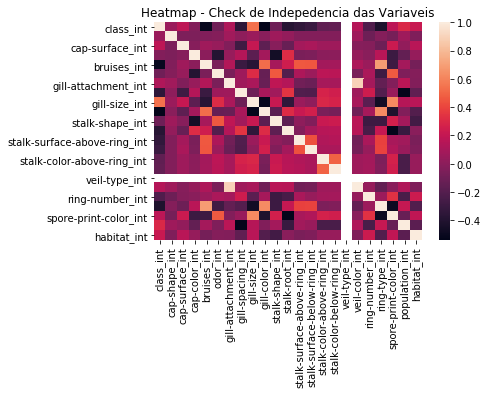

In [14]:
plot = sb.heatmap(mushrooms_int.corr())
plt.title('Heatmap - Check de Indepedencia das Variaveis')
plt.show(plot)

Vemos que a variável veil-type_int não agrega nenhuma informação e, por isso, vamos remove-la

In [15]:
mushrooms_int.drop('veil-type_int', axis=1, inplace=True)
mushrooms_int

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [16]:
corr = mushrooms_int.corr(method='pearson')
corr

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
class_int,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape_int,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface_int,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color_int,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises_int,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor_int,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment_int,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing_int,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size_int,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color_int,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


### 7 - Treinamento do modelo

Separar o conjunto em variavel resposta e variaveis de treinamento

In [17]:
X = mushrooms_int.iloc[:,1:].values
y = mushrooms_int.iloc[:,0].values
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (8124, 21)
Shape de y: (8124,)


Dividir em treino e teste (teste com 30%)

In [18]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 25)

Classificador Naive Bayes Gaussiano

In [19]:
classificador = GaussianNB()
classificador.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred = classificador.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print("Matriz de confusão", '\n',cm)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1261
           1       0.93      0.92      0.92      1177

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438

0.92616899097621
Matriz de confusão 
 [[1178   83]
 [  97 1080]]
